In [2]:
import sys
project_root = "/home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch"
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [1]:
import requests
from pathlib import Path
import mdtraj as md

input_trajectory_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.dcd"
input_topology_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"

trj_in = "traj.xtc"
str_in = "structure.pdb"

system = 'A016S'
# Downloading trajectory and structure for training
traj_train_URL = f"https://mmb-dev.mddbr.eu/api/rest/v1/projects/{system}/trajectory?format=xtc&frames=1-10000"
pdb_train_URL = f"https://mmb-dev.mddbr.eu/api/rest/v1/projects/{system}/structure"
traj_train_path = trj_in
structure_train_path = str_in
Path(traj_train_path).parent.mkdir(parents=True, exist_ok=True)
req = requests.get(traj_train_URL, allow_redirects=True)
open(traj_train_path, 'wb').write(req.content)
req = requests.get(pdb_train_URL, allow_redirects=True)
open(structure_train_path, 'wb').write(req.content)

# Load trajectory
train_traj = md.load(traj_train_path, top=structure_train_path)
train_traj.superpose(train_traj, 0)
train_traj.save_xtc(trj_in)

In [3]:
import nglview as nv
view = nv.show_mdtraj(train_traj)
view.clear_representations()
view.add_cartoon(color='spectrum')
view.add_spacefill(selection='CA', color='red', radius=0.3)
view

NGLWidget(max_frame=9999)

In [4]:
from biobb_pytorch.mdae.mdfeaturizer import MDFeaturizer

# Inputs
input_trajectory_file = trj_in
input_topology_file = str_in

# Opcional inputs
input_labels_file = None
input_weights_file = None

# Outputs
output_file = "1NE4_6NO7_b.dcd.pt"
output_stats_file = "1NE4_6NO7_b.dcd.stats.pt"

properties = {
    'cartesian': {'selection': 'name CA'},
    # 'distances': {'selection': 'name CA', 
    #               'cutoff': 0.4, 
    #               'periodic': True,
    #               'bonded': False},
    # 'angles': {'selection': 'backbone', 
    #            'periodic': True, 
    #            'bonded': True},
    # 'dihedrals': {'selection': 'backbone', 
    #               'periodic': True, 
    #               'bonded': True},
    'options': {'timelag': 1}, 
    #             'norm_in': {'mode': 'min_max'}
    #             },
    
    'remove_tmp': True,
    'disable_sandbox': True,
    'disable_logs': True,   # No va
}

MDFeaturizer(
    input_trajectory_path=input_trajectory_file,
    input_topology_path=input_topology_file,
    input_labels_npy_path=input_labels_file,
    input_weights_npy_path=input_weights_file,
    output_dataset_pt_path=output_file,
    output_stats_pt_path=output_stats_file,
    properties=properties
)


/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


2025-09-14 18:52:25,538 [MainThread  ] [INFO ]  ## BioBB Featurization - MDFeaturePipeline ##
2025-09-14 18:52:25,538 [MainThread  ] [INFO ]  Obtaining the topology information from structure.pdb
2025-09-14 18:52:25,616 [MainThread  ] [INFO ]  Available Topology Properties:
2025-09-14 18:52:25,616 [MainThread  ] [INFO ]    - Number of chains: 1
2025-09-14 18:52:25,616 [MainThread  ] [INFO ]    - Number of residues: 267
2025-09-14 18:52:25,617 [MainThread  ] [INFO ]    - Number of atoms: 267
2025-09-14 18:52:25,617 [MainThread  ] [INFO ]    - Number of distances: N/A
2025-09-14 18:52:25,618 [MainThread  ] [INFO ]    - Number of angles: N/A
2025-09-14 18:52:25,618 [MainThread  ] [INFO ]    - Number of dihedrals: N/A


/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/biobb_common/generic/biobb_object.py:154: UserWarning: Warning: disable_logs is not a recognized property. The most similar property is: disable_sandbox
  warnings.warn(
/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/biobb_common/tools/file_utils.py:770: UserWarning: biobb_pytorch.mdae.mdfeaturizer input_trajectory_path: traj.xtc extension is not in the valid extensions list: ['dcd']. If you want to suppress this message, please set the check_extensions property to False
  warnings.warn(not_valid_extension_error_string)


2025-09-14 18:52:27,441 [MainThread  ] [INFO ]  Available Trajectory Properties:
2025-09-14 18:52:27,441 [MainThread  ] [INFO ]     - Number of frames: 10000
2025-09-14 18:52:27,442 [MainThread  ] [INFO ]  Featurizing the trajectory traj.xtc
2025-09-14 18:52:27,768 [MainThread  ] [INFO ]  Features:
2025-09-14 18:52:27,769 [MainThread  ] [INFO ]    Cartesian:
2025-09-14 18:52:27,770 [MainThread  ] [INFO ]     - Topology Selection: name CA
2025-09-14 18:52:27,770 [MainThread  ] [INFO ]     - Number of features: 801
2025-09-14 18:52:27,771 [MainThread  ] [INFO ]    Distances:
2025-09-14 18:52:27,771 [MainThread  ] [INFO ]     - Topology Selection: None
2025-09-14 18:52:27,772 [MainThread  ] [INFO ]     - Number of features: 0
2025-09-14 18:52:27,772 [MainThread  ] [INFO ]    Angles:
2025-09-14 18:52:27,772 [MainThread  ] [INFO ]     - Topology Selection: None
2025-09-14 18:52:27,773 [MainThread  ] [INFO ]     - Number of features: 0
2025-09-14 18:52:27,774 [MainThread  ] [INFO ]    Dihedr

0

In [7]:
from biobb_pytorch.mdae.build_model import buildModel

input_stats_path = "1NE4_6NO7_b.dcd.stats.pt"
output_model_pth_file = "test_model.pth"


properties = {
    "model_type": "AutoEncoder",
    "n_cvs": 3,
    "encoder_layers": [512, 256, 128, 64, 32],
    "decoder_layers": [32, 64, 128, 256, 512],
    "options": {
        "encoder": {"activation": "relu", "last_layer_activation": False},
        "decoder": {"activation": "relu", "last_layer_activation": "sigmoid"},
        "optimizer": {"lr": 5e-5},
        
        "loss_function": {
            "loss_type": "MSELoss",
            }
    }
}

buildModel(input_stats_pt_path=input_stats_path,
           output_model_pth_path=output_model_pth_file,
           properties=properties)


2025-09-14 18:55:21,038 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.build_model Version: 5.0.0
2025-09-14 18:55:21,061 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.stats.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/6614fa5b-e658-4e6b-a2a6-4ca6c508812b
2025-09-14 18:55:21,070 [MainThread  ] [INFO ]  ## BioBB AutoEncoder Builder ##
2025-09-14 18:55:21,070 [MainThread  ] [INFO ]  
2025-09-14 18:55:21,071 [MainThread  ] [INFO ]  Hyperparameters:
2025-09-14 18:55:21,071 [MainThread  ] [INFO ]  ----------------
2025-09-14 18:55:21,073 [MainThread  ] [INFO ]  model_type: AutoEncoder
2025-09-14 18:55:21,074 [MainThread  ] [INFO ]  n_cvs: 3
2025-09-14 18:55:21,074 [MainThread  ] [INFO ]  encoder_layers: [512, 256, 128, 64, 32]
2025-09-14 18:55:21,074 [MainThread  ] [INFO ]  decoder_layers: [32, 64, 128, 256, 512]
2025-09-14 18:55:21,075 [MainThread  ] [INFO ]  loss_function: MSELoss()
2025-09-14 18:55:21,075 [MainThread  ] [INFO ]  optio

0

In [8]:
from biobb_pytorch.mdae.train_model import trainModel

properties = {
    'Dataset': {
        'batch_size': 16,
        'shuffle': True,
        'split': {'random_split': True,
                  'train_prop': 0.9,
                  'val_prop': 0.1,

        },
    },
    'Trainer': {
        'max_epochs': 100,
        'enable_checkpointing': False,
        'callbacks': {},
        
    },
    'disable_sandbox': True
}

# Inputs
input_model_pth_file = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Outputs
output_model_pth_file = "test_model.pth"
output_model_metrics_file = "test_model_metrics.npz"

trainModel(
    input_model_pth_path=input_model_pth_file,
    input_dataset_pt_path=input_dataset_pt_path,
    output_model_pth_path=output_model_pth_file,
    output_metrics_npz_path=output_model_metrics_file,
    properties=properties
)


2025-09-14 18:55:21,159 [MainThread  ] [INFO ]  ## BioBB Model Trainer ##
2025-09-14 18:55:21,161 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.train_model Version: 5.0.0
2025-09-14 18:55:21,161 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-09-14 18:55:21,169 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-09-14 18:55:21,504 [MainThread  ] [INFO ]  Start training...


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type          | Params | Mode  | In sizes | Out sizes
-------------------------------------------------------------------------
0 | loss_fn | MSELoss       | 0      | train | ?        | ?        
1 | norm_in | Normalization | 0      | train | [1, 801] | [1, 801] 
2 | encoder | FeedForward   | 585 K  | train | [1, 801] | [1, 3]   
3 | decoder | FeedForward   | 586 K  | train | ?        | ?        
-------------------------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.685     Total estimated model params size (MB)
29        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


2025-09-14 19:09:01,398 [MainThread  ] [INFO ]  Training Metrics saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model_metrics.npz
2025-09-14 19:09:01,399 [MainThread  ] [INFO ]  File size: 3.42 KB
2025-09-14 19:09:01,411 [MainThread  ] [INFO ]  Trained Model saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-09-14 19:09:01,411 [MainThread  ] [INFO ]  File size: 4.49 MB
2025-09-14 19:09:01,412 [MainThread  ] [INFO ]  Removed: []


0

Available Training metrics:  ['epoch', 'train_loss', 'train_loss_step', 'valid_loss', 'valid_loss_epoch', 'train_loss_epoch']


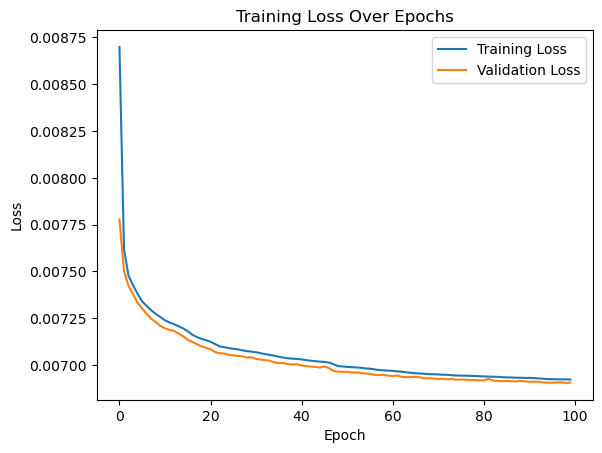

In [9]:
import numpy as np
import matplotlib.pyplot as plt

train_metrics = np.load(output_model_metrics_file)
print("Available Training metrics: ", train_metrics.files)

train_loss = train_metrics['train_loss']
valid_loss = train_metrics.get('valid_loss', None)

# Plot training loss
plt.plot(train_loss, label='Training Loss')
if valid_loss is not None:
    plt.plot(valid_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [10]:
from biobb_pytorch.mdae.evaluate_model import evaluateModel

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Outputs
output_model_results_file = "test_model_results.npz"

properties = {
    'Dataset': {
        'batch_size': 4,

        }
    }

evaluateModel(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_model_results_file,
    properties=properties
)


2025-09-14 19:09:01,666 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-09-14 19:09:01,667 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.evaluate_model Version: 5.0.0
2025-09-14 19:09:01,672 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/ac551a09-3bcb-4a37-b19a-008d50a31038
2025-09-14 19:09:01,711 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/ac551a09-3bcb-4a37-b19a-008d50a31038
2025-09-14 19:09:01,712 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-09-14 19:09:01,715 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-09-14 19:09:02,137 [MainThread  ] [INFO ]  Start evaluating...


/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/core/module.py:445: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


2025-09-14 19:09:04,664 [MainThread  ] [INFO ]  Evaluation Results saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model_results.npz
2025-09-14 19:09:04,665 [MainThread  ] [INFO ]  File size: 5.67 MB
2025-09-14 19:09:04,665 [MainThread  ] [INFO ]  Removed: []


0

Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).


Available Evaluation results:  ['xhat', 'z', 'eval_loss']
Evaluation Loss:  0.006920378003735095


Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator at

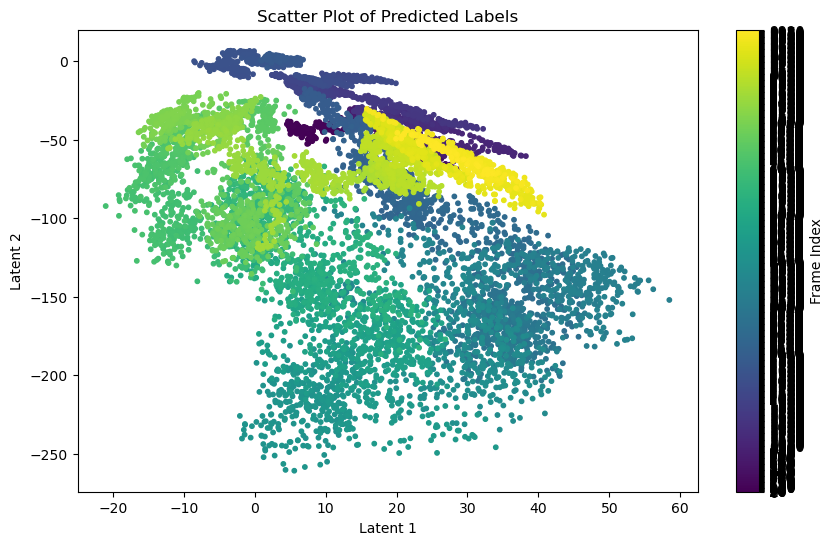

In [11]:
import numpy as np
import matplotlib.pyplot as plt

outputs = np.load(output_model_results_file, allow_pickle=True)
print("Available Evaluation results: ", outputs.files)

z = outputs['z']
eval_loss = outputs['eval_loss']

print("Evaluation Loss: ", eval_loss)

np.save("z.npy", z)

plt.figure(figsize=(10, 6))
plt.scatter(z[:, 0], z[:, 1], c=np.arange(z.shape[0]), s=10, alpha=1.0)
plt.colorbar(ticks=range(z.shape[0])[::10], label='Frame Index')
plt.xlabel('Latent 1')
plt.ylabel('Latent 2')
plt.title('Scatter Plot of Predicted Labels')
plt.show()

In [12]:
from biobb_pytorch.mdae.encode_model import evaluateEncoder

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Outputs
output_encoder_results_file = "test_encoder_results.npz"

properties = {
    'Dataset': {
        'batch_size': 4,

        }
    }

evaluateEncoder(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_encoder_results_file,
    properties=properties
)

2025-09-14 19:09:06,771 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-09-14 19:09:06,772 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.encode_model Version: 5.0.0
2025-09-14 19:09:06,775 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/4f375f75-b6c0-4255-ad77-c889fb304653
2025-09-14 19:09:06,808 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/4f375f75-b6c0-4255-ad77-c889fb304653
2025-09-14 19:09:06,809 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-09-14 19:09:06,813 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-09-14 19:09:07,148 [MainThread  ] [INFO ]  Start evaluating...
2025-09-14 19:09:

0

Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).


Available Encoded results:  ['z']


Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1000 ticks ([0, ..., 9990]), which exceeds Locator.MAXTICKS (1000).
Locator at

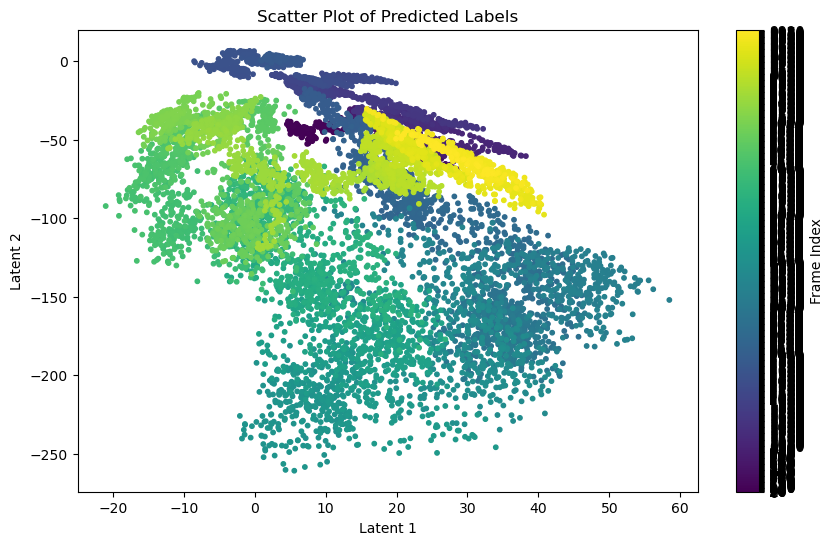

In [13]:
import numpy as np
import matplotlib.pyplot as plt

outputs = np.load(output_encoder_results_file, allow_pickle=True)
print("Available Encoded results: ", outputs.files)

z = outputs['z']

plt.figure(figsize=(10, 6))
plt.scatter(z[:, 0], z[:, 1], c=np.arange(z.shape[0]), s=10, alpha=1.0)
plt.colorbar(ticks=range(z.shape[0])[::10], label='Frame Index')
plt.xlabel('Latent 1')
plt.ylabel('Latent 2')
plt.title('Scatter Plot of Predicted Labels')
plt.show()

In [14]:
from biobb_pytorch.mdae.decode_model import evaluateDecoder

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_npy_path = "z.npy"

# Outputs
output_decoded_results_npz_path = "decoded_results.npz"

properties = {
    'Dataset': {
        'batch_size': 4,
    }
}

evaluateDecoder(input_model_pth_path=input_model_pth_path,
                    input_dataset_npy_path=input_dataset_npy_path,
                    output_results_npz_path=output_decoded_results_npz_path,
                    properties=properties)
                


2025-09-14 19:09:10,046 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-09-14 19:09:10,046 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.decode_model Version: 5.0.0
2025-09-14 19:09:10,049 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/95640b17-86e5-4c91-9b59-7ded9f40e971
2025-09-14 19:09:10,050 [MainThread  ] [INFO ]  Copy: z.npy to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/95640b17-86e5-4c91-9b59-7ded9f40e971
2025-09-14 19:09:10,051 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-09-14 19:09:10,054 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/z.npy
2025-09-14 19:09:10,055 [MainThread  ] [INFO ]  Start evaluating...
2025-09-14 19:09:10,924 [MainThread  ] [INF

0

In [15]:
from biobb_analysis.gromacs.gmx_trjconv_str import gmx_trjconv_str

prop = {
    'selection': 'C-alpha',
}
gmx_trjconv_str(input_structure_path=str_in,
                input_top_path=str_in,
                output_str_path="reconstructed.pdb",
                input_index_path='alpha_carbons.ndx',
                properties=prop)

2025-09-14 19:09:10,947 [MainThread  ] [INFO ]  Executing biobb_analysis.gromacs.gmx_trjconv_str Version: 4.2.0
2025-09-14 19:09:10,949 [MainThread  ] [INFO ]  Copy: /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/structure.pdb to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/47c5ea0a-67ed-4719-9ca3-bb97846f715b
2025-09-14 19:09:10,950 [MainThread  ] [INFO ]  Copy: /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/structure.pdb to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/47c5ea0a-67ed-4719-9ca3-bb97846f715b
2025-09-14 19:09:10,951 [MainThread  ] [INFO ]  Copy: /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/alpha_carbons.ndx to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/47c5ea0a-67ed-4719-9ca3-bb97846f715b
2025-09-14 19:09:10,952 [MainThread  ]

In [16]:
import nglview as nv
import mdtraj as md
import numpy as np

outputs = np.load("decoded_results.npz")
print("Available Decoded results: ", outputs.files)

xhat = outputs['xhat'] 
print(xhat.shape)

top = md.load("reconstructed.pdb")

original_traj = md.load(trj_in, top=str_in)
select_ca = original_traj.topology.select("name CA")
original_traj = original_traj.atom_slice(select_ca)
reconstructed_traj = md.Trajectory(xhat.reshape(len(xhat), top.n_atoms, 3), 
                                   topology=top.topology)

view = nv.show_mdtraj(reconstructed_traj)
view

Available Decoded results:  ['xhat']
(9999, 801)


NGLWidget(max_frame=9998)

In [17]:
from biobb_gromacs.gromacs.make_ndx import make_ndx

input_structure_path = str_in
output_ndx_path = "alpha_carbons.ndx"

prop = { 'selection': 'a CA' }

make_ndx(input_structure_path=input_structure_path,
         output_ndx_path=output_ndx_path,
         properties=prop)

2025-09-14 19:09:13,617 [MainThread  ] [INFO ]  Executing biobb_gromacs.gromacs.make_ndx Version: 4.2.0
2025-09-14 19:09:13,619 [MainThread  ] [INFO ]  Copy: structure.pdb to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/07644dcc-138e-4000-b5fe-52721786c569
2025-09-14 19:09:13,621 [MainThread  ] [INFO ]  Copy: /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/df194c33-e5ef-4cca-a5fb-3e7bbd37c6fa.stdin to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/07644dcc-138e-4000-b5fe-52721786c569
2025-09-14 19:09:13,621 [MainThread  ] [INFO ]  gmx -nobackup -nocopyright make_ndx -f /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/07644dcc-138e-4000-b5fe-52721786c569/structure.pdb -o /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/07644dcc-138e-4000-b5fe-52721786c569/alpha_carbons.ndx < /home/pzanders/Doc

0

In [18]:
from biobb_pytorch.mdae.make_plumed import generatePlumed

# Inputs
input_model_pth_file = "test_model.pth"
input_ndx_file = "alpha_carbons.ndx"
input_reference_pdb_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"
input_stats_pt_file = "1NE4_6NO7_b.dcd.stats.pt"

# Outputs
output_model_ptc_file = "plumed_model.ptc"
output_plumed_file = "plumed.dat"
output_plumed_feature_file = "features.dat" 

properties = {
                "additional_actions": [
                    {
                        "name": "ENERGY",
                        "label": "ene"
                    },
                ],
                "fit_to_template": {
                    "STRIDE": 1,
                    "TYPE": "OPTIMAL"
                },
                "group": {
                    "label": "backbone",
                    "selection": "backbone"
                },
                "bias": [
                    {
                        "name": "METAD",
                        "label": "bias",
                        "params": {
                            "ARG": "cv.*",
                            "PACE": 500,
                            "HEIGHT": 1.2,
                            "SIGMA": 0.35,
                            "FILE": "HILLS",
                            "BIASFACTOR": 8
                        }
                    }
                ],
                "prints": {
                    "ARG": "cv.*,bias.*",
                    "STRIDE": 1,
                    "FILE": "COLVAR"
                }
            }

generatePlumed(
    input_model_pth_path=input_model_pth_file,
    input_ndx_path=input_ndx_file,
    input_reference_pdb_path=input_reference_pdb_file,
    input_stats_pt_path=input_stats_pt_file,
    output_model_ptc_path=output_model_ptc_file,
    output_plumed_dat_path=output_plumed_file,
    output_features_dat_path=output_plumed_feature_file,
    properties=properties
)


2025-09-14 19:09:14,102 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.make_plumed Version: 5.0.0
2025-09-14 19:09:14,105 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/611396d5-e838-4073-b291-5cba8758b757
2025-09-14 19:09:14,107 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.stats.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/611396d5-e838-4073-b291-5cba8758b757
2025-09-14 19:09:14,108 [MainThread  ] [INFO ]  Copy: /home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/611396d5-e838-4073-b291-5cba8758b757
2025-09-14 19:09:14,109 [MainThread  ] [INFO ]  Copy: alpha_carbons.ndx to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/611396d5-e838-4073-b291-5cba8758b757
2025-09-14 19:09:14,110 [MainThread  ] [IN

0

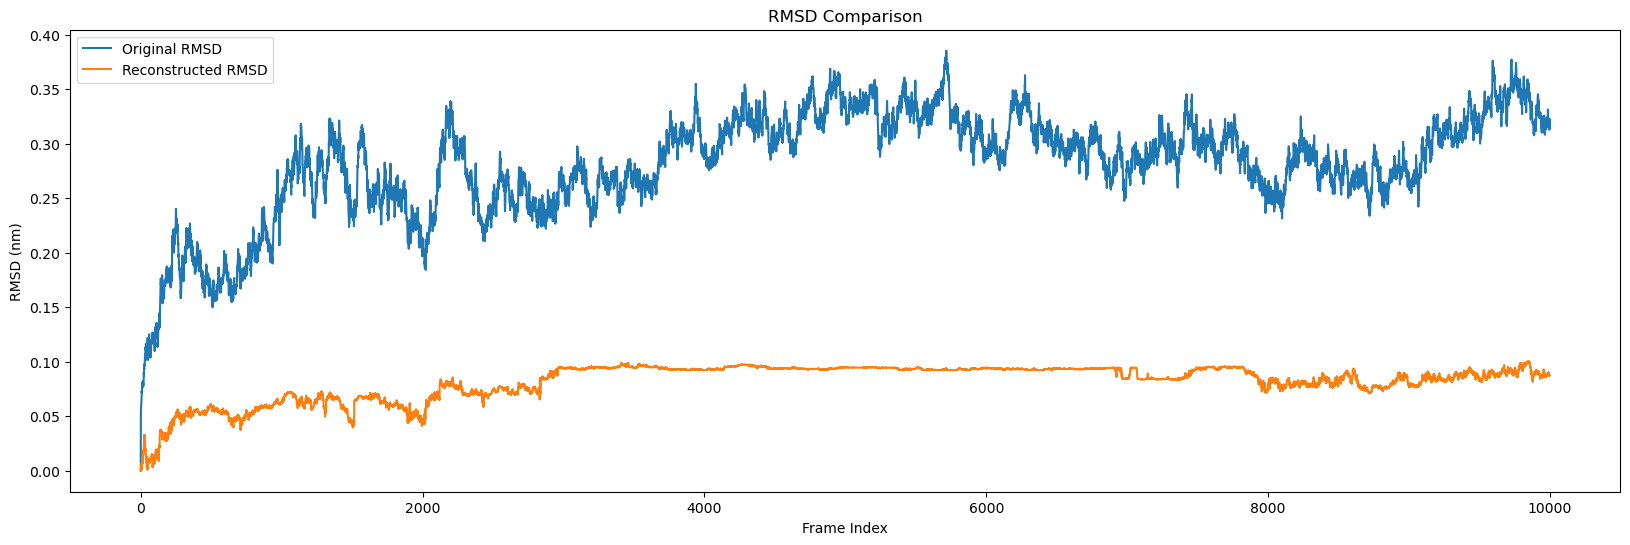

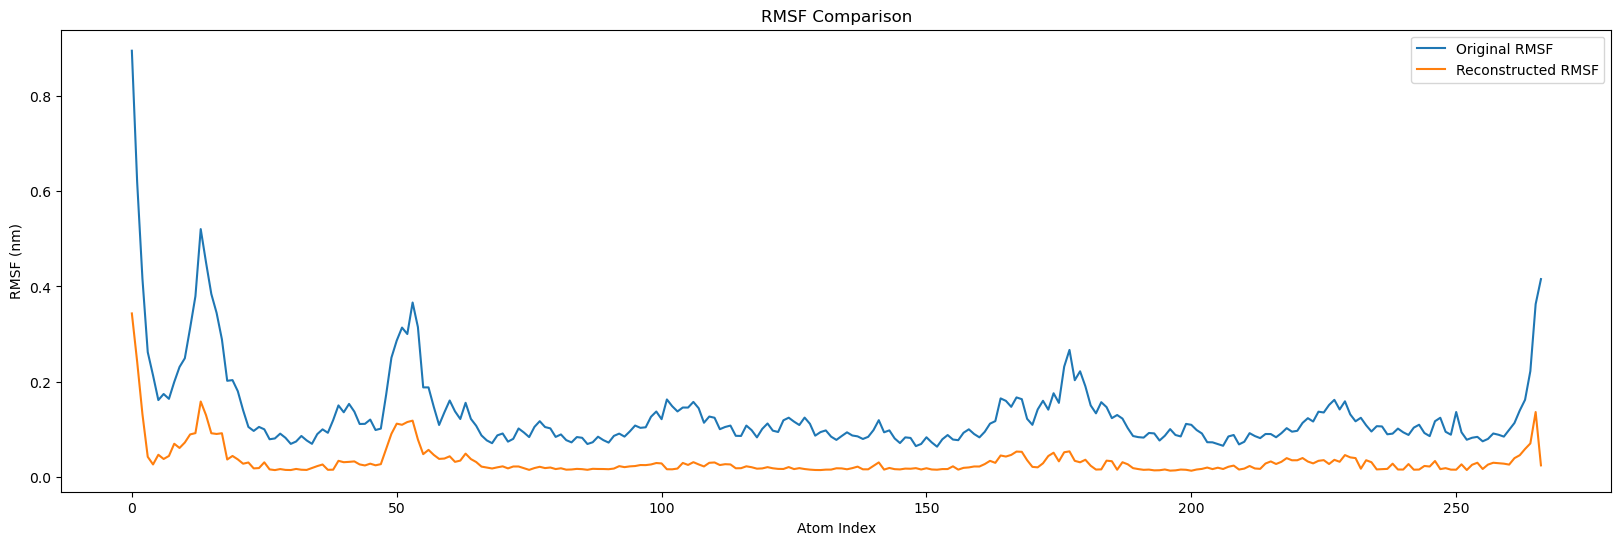

In [19]:
import matplotlib.pyplot as plt

original_rmsd = md.rmsd(original_traj, original_traj)
reconstructed_rmsd = md.rmsd(reconstructed_traj, reconstructed_traj)

original_rmsf = md.rmsf(original_traj, original_traj)
reconstructed_rmsf = md.rmsf(reconstructed_traj, reconstructed_traj)

plt.figure(figsize=(20, 6))
plt.plot(original_rmsd, label='Original RMSD')
plt.plot(reconstructed_rmsd, label='Reconstructed RMSD')
plt.xlabel('Frame Index')
plt.ylabel('RMSD (nm)')
plt.title('RMSD Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(original_rmsf, label='Original RMSF')
plt.plot(reconstructed_rmsf, label='Reconstructed RMSF')
plt.xlabel('Atom Index')
plt.ylabel('RMSF (nm)')
plt.title('RMSF Comparison')
plt.legend()
plt.show()

In [20]:
print(xhat)
print(original_traj.xyz)

[[ 2.1207013e+00  2.4146466e+00 -7.9528010e-01 ...  1.4843796e+00
   1.1924801e-01 -1.7393030e+00]
 [ 2.1206281e+00  2.4146338e+00 -7.9529417e-01 ...  1.4843066e+00
   1.1922305e-01 -1.7393144e+00]
 [ 2.1207294e+00  2.4146473e+00 -7.9523182e-01 ...  1.4844079e+00
   1.1923007e-01 -1.7392092e+00]
 ...
 [ 2.1284497e+00  2.0915804e+00 -9.0462571e-01 ...  1.4921283e+00
   2.0456742e-03 -1.7309042e+00]
 [ 2.1287959e+00  2.0500207e+00 -8.9441884e-01 ...  1.4924744e+00
   2.2110813e-03 -1.7307972e+00]
 [ 2.1288075e+00  2.0377016e+00 -9.1570109e-01 ...  1.4924859e+00
   2.3756009e-03 -1.7307175e+00]]
[[[ 1.3317642   2.6780002  -0.44679034]
  [ 1.4447641   2.4010003  -0.6837903 ]
  [ 1.4887643   2.0319998  -0.77379024]
  ...
  [ 1.657764    0.6709998  -1.8177904 ]
  [ 1.7107639   0.29900008 -1.8997904 ]
  [ 1.3507643   0.20500019 -1.7837902 ]]

 [[ 1.3509399   2.7071238  -0.44873786]
  [ 1.43494     2.4121237  -0.6717379 ]
  [ 1.4689399   2.0251236  -0.73173785]
  ...
  [ 1.6789399   0.6601234 

In [21]:
from biobb_pytorch.mdae.explainability.LRP import relevancePropagation

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Output1
output_lrp_results_npz_path1 = "lrp_results.npz"

properties={
              'Dataset': {
                  'indices': list(range(0, 20)),  
                  'batch_size': 4,
              }
}

relevancePropagation(input_model_pth_path=input_model_pth_path,
                           input_dataset_pt_path=input_dataset_pt_path,
                           output_results_npz_path=output_lrp_results_npz_path1,
                           properties=properties)

# Output2
output_lrp_results_npz_path2 = "lrp_results2.npz"

properties={
              'Dataset': {
                  'indices': list(range(230, 250)),
                  'batch_size': 4,
              }
}

relevancePropagation(input_model_pth_path=input_model_pth_path,
                           input_dataset_pt_path=input_dataset_pt_path,
                           output_results_npz_path=output_lrp_results_npz_path2,
                           properties=properties)



2025-09-14 19:09:14,522 [MainThread  ] [INFO ]  ## BioBB Layer-wise Relevance Propagation ##
2025-09-14 19:09:14,523 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.explainability.LRP Version: 5.0.0
2025-09-14 19:09:14,526 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/e4f8a3cd-a790-4b68-a3d8-527574435027
2025-09-14 19:09:14,569 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/e4f8a3cd-a790-4b68-a3d8-527574435027
2025-09-14 19:09:14,570 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-09-14 19:09:14,574 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-09-14 19:09:14,964 [MainThread  ] [INFO ]  Start LRP anal

0

Available LRP results:  ['global_importance', 'global_importance_raw']


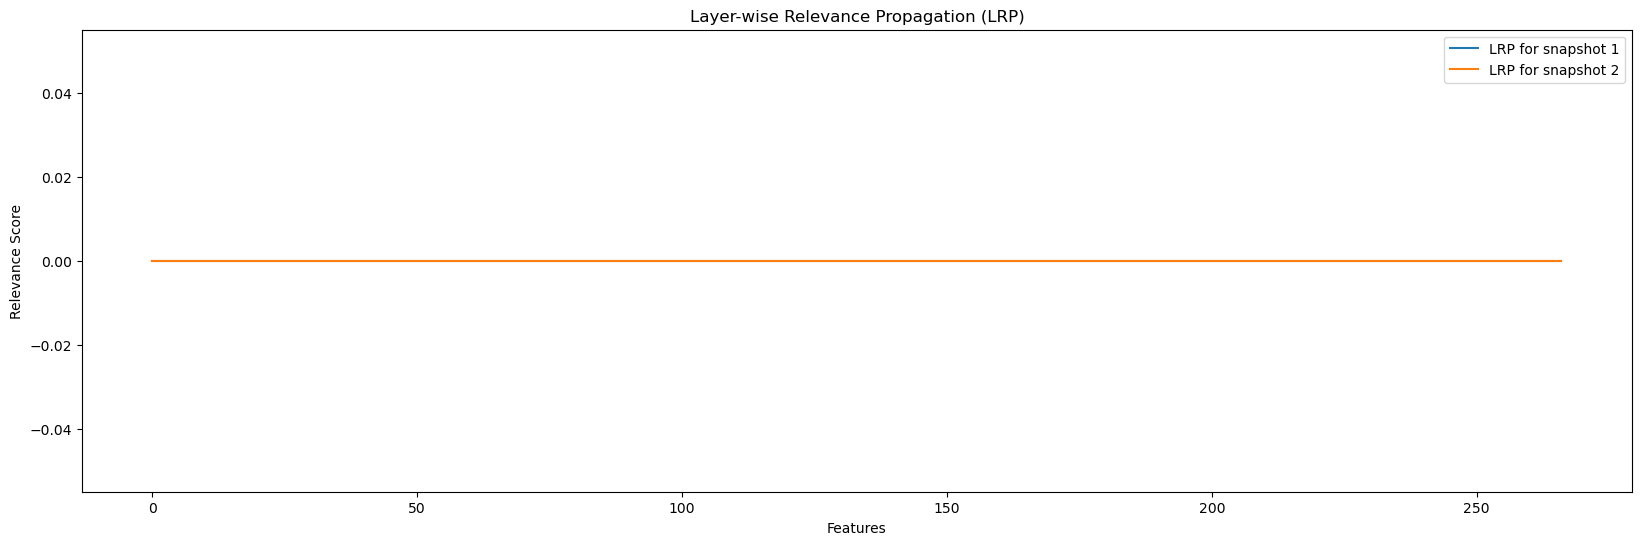

In [22]:
import numpy as np
import matplotlib.pyplot as plt

outputs1 = np.load(output_lrp_results_npz_path1, allow_pickle=True)
importance_first_frame = outputs1['global_importance']

outputs2 = np.load(output_lrp_results_npz_path2, allow_pickle=True)
importance_last_frame = outputs2['global_importance']

print("Available LRP results: ", outputs1.files)

plt.figure(figsize=(20, 6))
plt.plot(importance_first_frame, label='LRP for snapshot 1')
plt.plot(importance_last_frame, label='LRP for snapshot 2')
plt.xlabel('Features')
plt.ylabel('Relevance Score')
plt.title('Layer-wise Relevance Propagation (LRP)')
plt.legend()
plt.show()
